In [20]:
import sys
sys.path.insert(0,'../src/')
from curve import *
from utils import *
from multiply_connected_pipe import MultiplyConnectedPipe
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [21]:
with open('./pipes_and_shifts.pickle','rb') as f:
    pipes, shifts = pickle.load(f)

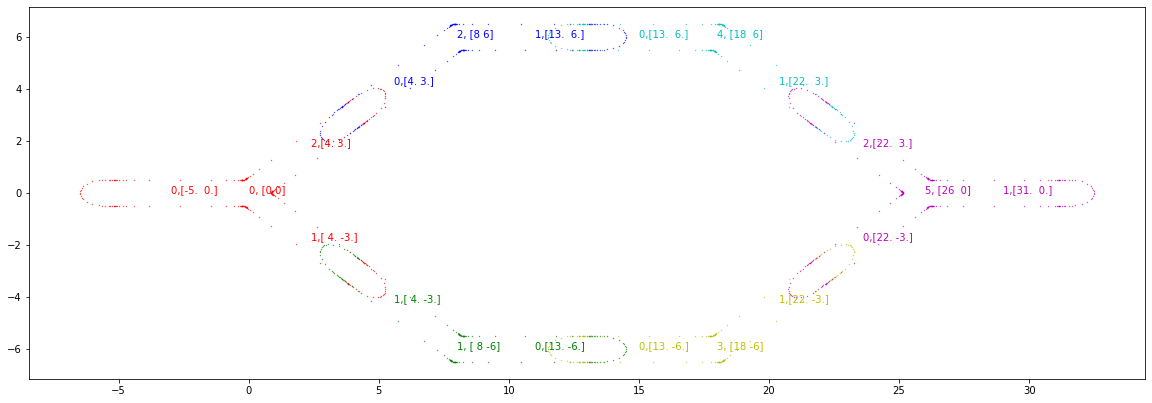

In [22]:
color = ['r','g','b','y','c','m','k']

fig,ax = plt.subplots(figsize=(20,10))
ax.set_aspect('equal')

for a,i,j,c in zip(range(10),pipes,shifts,color):
    panel_break_pts = np.array([p.start_pt + j for p in i.panels])
    ax.scatter(panel_break_pts[:,0], panel_break_pts[:,1],c=c,s=0.1)
    for k,let in enumerate(i.lets):
        ax.text(*(0.6*let.matching_pt + j),f'{k},{let.matching_pt + j}',color=c)
    ax.text(*j,f'{a}, {j}',color=c)

In [23]:
pipe = pipes[0]
panels = pipe.panels
pairs = pipe.mat_vec.close_panel_interactions

In [24]:
bent_panels = [(i,panel) for i,panel in enumerate(panels) if not isinstance(panel.parent, Line)]
stra_panels = [(i,panel) for i,panel in enumerate(panels) if isinstance(panel.parent, Line)]

In [25]:
len(bent_panels), len(stra_panels)

(172, 76)

## developing the integral rules on the straight panels

In [61]:
i,p = stra_panels[1]
targ_pt1= stra_panels[0][1].t
targ_pt2= stra_panels[2][1].t

In [75]:
def normalize_pt(panel,t,with_affine=True):
    if with_affine:
        return 2* (t - pt2cplx(panel.start_pt)) / pt2cplx(panel.end_pt - panel.start_pt)  - 1
    else:
        return 2* t / pt2cplx(panel.end_pt - panel.start_pt)

In [296]:
nom_pane_pts = normalize_pt(p, p.t)
nom_pane_dt = normalize_pt(p, p.dt, with_affine=False)
nom_targ_pt1 = normalize_pt(p, targ_pt1)
nom_targ_pt2 = normalize_pt(p, targ_pt2)
all_targ = normalize_pt(p,pipe.t[pairs[i]])

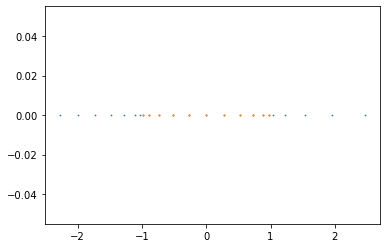

In [300]:
plt.scatter(all_targ.real,all_targ.imag,s=0.5)
plt.scatter(nom_pane_pts.real, nom_pane_pts.imag,s=1)

this is the stable version of cauchy_integral

In [301]:
def analytic_cauchy_integral(targets):
    "not self interactions"
    psi = np.pi/4
    return (1j*psi + np.log((1-targets)/(-1-targets)/np.exp(1j*psi)))

In [302]:
p1 = analytic_cauchy_integral(all_targ)

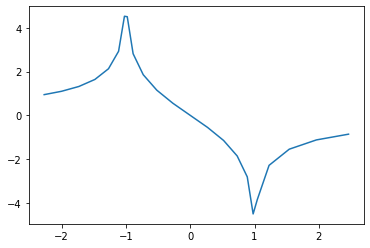

In [307]:
plt.plot(all_targ.real, p1.real)

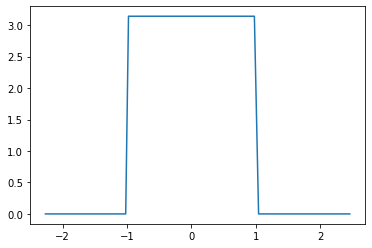

In [308]:
plt.plot(all_targ.real, p1.imag)